<a href="https://colab.research.google.com/github/ucfilho/ANN_2021_01/blob/main/RecurrentANN/LSTM_Recorrent_Neural_Network_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [3]:
'''
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
'''

'\nfrom tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten\nfrom tensorflow.keras.models import Model\nfrom tensorflow.keras.optimizers import SGD, Adam\n'

In [4]:
from keras.layers import Input, SimpleRNN, Dense, Flatten, LSTM
from keras.models import Sequential
from keras.optimizers import SGD, Adam

In [5]:
num = 200
series = np.sin(0.1*np.arange(num)+0.1*np.random.randn(num))

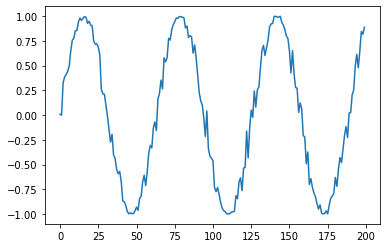

In [6]:
plt.plot(series)

In [7]:
P = 10 # period
D = 1
X = []
Y = []

for t in range(num-P):
  t_next = t+ P
  xx = series[t:t_next]
  X.append(xx)
  yy = series[t_next]
  Y.append(yy)

X = np.array(X).reshape(-1,P,1) # data NxDxP
Y = np.array(Y)
print('input shape',X.shape,'output shape',Y.shape )

input shape (190, 10, 1) output shape (190,)


In [8]:
X[0]

array([[ 0.00899619],
       [-0.00082319],
       [ 0.32541817],
       [ 0.38687293],
       [ 0.41085627],
       [ 0.44274946],
       [ 0.49630424],
       [ 0.64817869],
       [ 0.75732273],
       [ 0.77842097]])

In [9]:
N, cols, other = X.shape
X_train = X[:-N//2]
Y_train = Y[:-N//2]
X_test = X[-N//2:]
Y_test = Y[-N//2:]

In [10]:
model = Sequential()
# Add an Embedding layer expecting input vocab of size 1000, and
# output embedding dimension of size 64.
model.add(Input(shape=(P,1)))

# Add a simpleRNN layer with 5 internal units.
model.add(LSTM(5,'relu'))

# Add a Dense layer with 1 units.
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5)                 140       
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='mse',optimizer=Adam(lr=0.1))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [12]:
r = model.fit(X_train,Y_train,
              epochs=100, 
              validation_data = ( X_test ,Y_test ) )

Epoch 1/100
3/3 [==============================] - 20s 349ms/step - loss: 0.5533 - val_loss: 0.0737
Epoch 2/100
3/3 [==============================] - 0s 29ms/step - loss: 0.1123 - val_loss: 0.1163
Epoch 3/100
3/3 [==============================] - 0s 39ms/step - loss: 0.1200 - val_loss: 0.0581
Epoch 4/100
3/3 [==============================] - 0s 28ms/step - loss: 0.0561 - val_loss: 0.0249
Epoch 5/100
3/3 [==============================] - 0s 39ms/step - loss: 0.0354 - val_loss: 0.0395
Epoch 6/100
3/3 [==============================] - 0s 31ms/step - loss: 0.0296 - val_loss: 0.0286
Epoch 7/100
3/3 [==============================] - 0s 26ms/step - loss: 0.0163 - val_loss: 0.0238
Epoch 8/100
3/3 [==============================] - 0s 28ms/step - loss: 0.0158 - val_loss: 0.0242
Epoch 9/100
3/3 [==============================] - 0s 29ms/step - loss: 0.0142 - val_loss: 0.0204
Epoch 10/100
3/3 [==============================] - 0s 30ms/step - loss: 0.0155 - val_loss: 0.0202
Epoch 11/100
3/3 

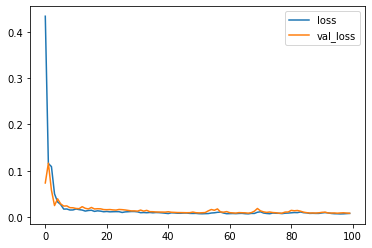

In [13]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

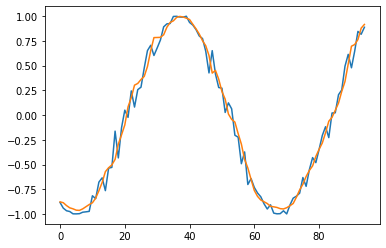

In [14]:
# this is a wrong way to do....
pred_Y = model.predict(X_test)
plt.plot(Y_test, label='prediction target')
plt.plot(pred_Y, label='prediction forecast')

In [15]:
pred_test = []
for xi in X_test:
  yi = model.predict(xi.reshape(1,-1,1))[0,0]
  pred_test.append(yi)

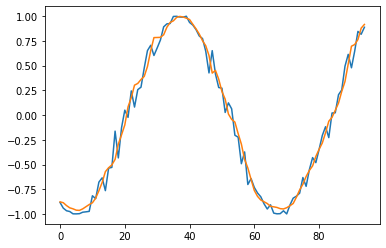

In [16]:
plt.plot(Y_test, label='prediction target')
plt.plot(pred_test, label='prediction forecast')

In [17]:
a,b = model.layers[1].get_weights()
print(a.shape,b.shape)

(5, 1) (1,)


In [18]:
print(a)
print('===============')
print(b)

[[ 1.0669093 ]
 [ 0.06328163]
 [-0.15471835]
 [-0.27675715]
 [-1.3746872 ]]
[0.23506816]
